In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] #petal length, petal width
y = (iris.target == 0).astype(np.int) #Iris setosa?

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Users\raven\AppData\Local\Temp\ipykernel_15192\3623503195.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) #Iris setosa?


In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__

'2.11.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape
X_train_full.dtype

dtype('uint8')

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal",
              "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.layers
hidden1 = model.layers[1]
hidden1.name
model.get_layer('dense') is hidden1

True

In [8]:
weights, biases = hidden1.get_weights()
weights
weights.shape
biases
biases.shape

(300,)

In [9]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd",
             metrics = ["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs = 30, 
                    validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7092 - accuracy: 0.7724 - val_loss: 0.5267 - val_accuracy: 0.8192
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4890 - accuracy: 0.8295 - val_loss: 0.4462 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4429 - accuracy: 0.8456 - val_loss: 0.4397 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4141 - accuracy: 0.8552 - val_loss: 0.3965 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8619 - val_loss: 0.3791 - val_accuracy: 0.8744
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3767 - accuracy: 0.8675 - val_loss: 0.3740 - val_accuracy: 0.8744
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3628 - accuracy: 0.8718 - val_loss: 0.3636 - val_accuracy:

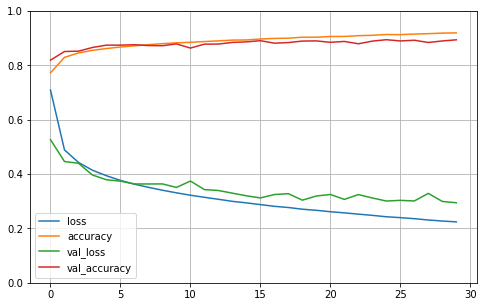

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) #set the vertical range to [0-1]
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.2747 - accuracy: 0.8452


[66.27468872070312, 0.8452000021934509]

In [13]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 120ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [15]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [16]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss = "mean_squared_error", optimizer = "sgd")
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
X_new = X_test[:3] #pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.1117 - val_loss: 0.5444
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4999 - val_loss: 0.4771
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4595 - val_loss: 0.4535
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4401 - val_loss: 0.4335
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4288 - val_loss: 0.4227
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4170 - val_loss: 0.4141
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4089 - val_loss: 0.4047
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4026 - val_loss: 0.3997
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3992 - val_loss: 0.3942
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3973 - val_loss: 0.3887

In [17]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation = "relu")(input_)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs = [input_], outputs = [output])

In [18]:
input_A = keras.layers.Input(shape = [5], name = "wide_input")
input_B = keras.layers.Input(shape = [6], name = "deep_input")
hidden1 = keras.layers.Dense(30, activation = "relu")(input_B)
hidden2 = keras.layers.Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name = "output")(concat)
model = keras.Model(inputs = [input_A, input_B], outputs = [output])

In [19]:
model.compile(loss = "mse", optimizer = keras.optimizers.SGD(lr = 1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs = 20,
                   validation_data = ((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.8120 - val_loss: 0.9955
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.7888 - val_loss: 3.4939
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 6.2715 - val_loss: 0.7151
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 1.2731 - val_loss: 5.0752
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 3.6893 - val_loss: 0.5287
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5095 - val_loss: 0.4784
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4823 - val_loss: 0.4623
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4490 - val_loss: 0.4353
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4339 - val_loss: 0.4165
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4206 - val_loss: 0.4257

In [20]:
output = keras.layers.Dense(1, name = "main_output")(concat)
aux_output = keras.layers.Dense(1, name = "aux_output")(hidden2)
model = keras.Model(inputs = [input_A, input_B], outputs = [output, aux_output])
model.compile(loss = ["mse", "mse"], loss_weights = [0.9, 0.1], optimizer = "sgd")

In [21]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs = 20,
                   validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 4s 4ms/step - loss: 0.7288 - main_output_loss: 0.6495 - aux_output_loss: 1.4425 - val_loss: 0.5278 - val_main_output_loss: 0.4778 - val_aux_output_loss: 0.9784
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4753 - main_output_loss: 0.4292 - aux_output_loss: 0.8903 - val_loss: 0.4544 - val_main_output_loss: 0.4152 - val_aux_output_loss: 0.8069
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4489 - main_output_loss: 0.4099 - aux_output_loss: 0.7994 - val_loss: 0.4351 - val_main_output_loss: 0.4001 - val_aux_output_loss: 0.7505
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4366 - main_output_loss: 0.4016 - aux_output_loss: 0.7519 - val_loss: 0.4262 - val_main_output_loss: 0.3929 - val_aux_output_loss: 0.7255
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4274 - main_output_loss: 0.3961 - aux_output_loss: 0.7090 - val_loss

In [22]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 161ms/step


In [23]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs) #handles standard args(e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()

In [24]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape = [8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
]) #or keras.Model([...])
model.compile(loss="mse", optimizer = keras.optimizers.SGD(learning_rate=1e-3))
model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid))
model.save("my_keras_model.h5")

Epoch 1/10
363/363 [==============================] - 3s 4ms/step - loss: 2.0711 - val_loss: 0.8718
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.7419 - val_loss: 0.6389
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6260 - val_loss: 0.5959
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5880 - val_loss: 0.5699
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5614 - val_loss: 0.5495
Epoch 6/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5412 - val_loss: 0.5353
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5260 - val_loss: 0.5234
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5143 - val_loss: 0.5123
Epoch 9/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5049 - val_loss: 0.5038
Epoch 10/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4967 - val_loss: 0.4977

In [25]:
model = keras.models.load_model("my_keras_model.h5")

In [26]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs = 10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4899
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4845
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4797
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4753
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4715
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4680
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4647
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4618
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4594
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4566


In [27]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only = True)
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") #roll back to best mode!

Epoch 1/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4546 - val_loss: 0.4571
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4524 - val_loss: 0.4543
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4502 - val_loss: 0.4521
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.4482 - val_loss: 0.4500
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4464 - val_loss: 0.4487
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4446 - val_loss: 0.4464
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4428 - val_loss: 0.4455
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4412 - val_loss: 0.4429
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4394 - val_loss: 0.4421
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4379 - val_loss: 0.4411

In [28]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10, 
                                                 restore_best_weights = True)
history = model.fit(X_train, y_train, epochs = 100, 
                   validation_data = (X_valid, y_valid),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4364 - val_loss: 0.4388
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4349 - val_loss: 0.4377
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4336 - val_loss: 0.4356
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4322 - val_loss: 0.4347
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4306 - val_loss: 0.4349
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4297 - val_loss: 0.4322
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4284 - val_loss: 0.4310
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4272 - val_loss: 0.4300
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4259 - val_loss: 0.4285
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4245 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3696 - val_loss: 0.3748
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3687 - val_loss: 0.3728
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3682 - val_loss: 0.3727
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3676 - val_loss: 0.3731
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3672 - val_loss: 0.3723
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3668 - val_loss: 0.3710
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3662 - val_loss: 0.3718
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3655 - val_loss: 0.3712
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3653 - val_loss: 0.3698
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3651 - val_loss: 

In [29]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [30]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%m_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [31]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid),
                   callbacks = [tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3594 - val_loss: 0.3635
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3595 - val_loss: 0.3635
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3588 - val_loss: 0.3630
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3585 - val_loss: 0.3630
Epoch 5/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3579 - val_loss: 0.3620
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3574 - val_loss: 0.3630
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3570 - val_loss: 0.3614
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3567 - val_loss: 0.3609
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3566 - val_loss: 0.3613
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3560 - val_loss: 0.3602

In [33]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step = step)
        data = (np.random.randn(100) + 2) * step / 100 #some random data
        tf.summary.histogram("my_hist", data, buckets = 50, step = step)
        images = np.random.rand(2, 32, 32, 3) # random 32 x 32 RGB images
        tf.summary.image("my_images", images * step / 1000, step = step)
        texts = ["The step is" + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step = step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate = 48000, step = step)

In [34]:
def build_model(n_hidden = 1, n_neurons = 30, learning_rate = 3e-3, input_shape = [8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation = "relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr = learning_rate)
    model.compile(loss = "mse", optimizer = optimizer)
    return model

In [37]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs = 100,
             validation_data = (X_valid, y_valid),
             callbacks = [keras.callbacks.EarlyStopping(patience = 10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

C:\Users\raven\AppData\Local\Temp\ipykernel_15192\3243929840.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5854 - val_loss: 0.6837
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5359 - val_loss: 0.4901
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4702 - val_loss: 0.4480
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4424 - val_loss: 0.4283
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4263 - val_loss: 0.4164
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4161 - val_loss: 0.4098
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4085 - val_loss: 0.4094
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4056 - val_loss: 0.3991
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3988 - val_loss: 0.3921
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3940 - val_lo

1/1 [==============================] - 0s 67ms/step


In [38]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv = 3)
rnd_search_cv.fit(X_train, y_train, epochs = 100,
                 validation_data = (X_valid, y_valid),
                 callbacks = [keras.callbacks.EarlyStopping(patience = 10)])

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8210 - val_loss: 0.6202
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5290 - val_loss: 0.4999
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4803 - val_loss: 0.4691
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4561 - val_loss: 0.4461
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4425 - val_loss: 0.4405
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4312 - val_loss: 0.4316
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4213 - val_loss: 0.4271
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4161 - val_loss: 0.4234
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4081 - val_loss: 0.4224
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4021 - val_lo

Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 1.7244 - val_loss: 2.3117
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 3.9362 - val_loss: 88.4439
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 59.4087 - val_loss: 118.9429
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 11/100
121/121 [=====

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0936 - val_loss: 0.6268
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5379 - val_loss: 0.5257
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4669 - val_loss: 0.4652
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4347 - val_loss: 0.4543
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4270 - val_loss: 0.4249
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4180 - val_loss: 0.4163
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4347 - val_loss: 0.4384
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4452 - val_loss: 0.4152
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3875 - val_loss: 0.3996
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3826 - val_lo

242/242 [==============================] - 1s 2ms/step - loss: 0.2596 - val_loss: 0.3048
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2594 - val_loss: 0.3129
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2583 - val_loss: 0.2909
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2567 - val_loss: 0.2927
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2568 - val_loss: 0.3033
Epoch 86/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3322


Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 0.9769 - val_loss: 0.6798
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5874 - val_loss: 0.5489
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5074 - val_loss: 0.4756
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4692 - val_loss: 0.4519
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4514 - val_loss: 0.4438
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4399 - val_loss: 0.4366
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4319 - val_loss: 0.4457
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4250 - val_loss: 0.4237
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4208 - val_loss: 0.4269
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4146 - val_lo

242/242 [==============================] - 1s 2ms/step - loss: 0.3119 - val_loss: 0.3123
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3130 - val_loss: 0.3110
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3127 - val_loss: 0.3244
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3113 - val_loss: 0.3158
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3135 - val_loss: 0.3240
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3104 - val_loss: 0.3085
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3095 - val_loss: 0.3168
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3117 - val_loss: 0.3148
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3086 - val_loss: 0.3347
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3082 - val_loss: 

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1513 - val_loss: 0.6957
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7086 - val_loss: 0.5546
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5171 - val_loss: 0.4818
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4764 - val_loss: 0.4554
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4550 - val_loss: 0.4416
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4435 - val_loss: 0.4333
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4320 - val_loss: 0.4481
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4250 - val_loss: 0.4242
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4193 - val_loss: 0.4104
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4147 - val_lo

242/242 [==============================] - 1s 2ms/step - loss: 0.3070 - val_loss: 0.3097
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3069 - val_loss: 0.3138
Epoch 83/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3069 - val_loss: 0.3193
Epoch 84/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3076 - val_loss: 0.3111
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3084 - val_loss: 0.3132
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3311 - val_loss: 0.3299
Epoch 87/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3458 - val_loss: 0.3084
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3119 - val_loss: 0.3073
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3090 - val_loss: 0.3144
Epoch 90/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3088 - val_loss: 

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.9311 - val_loss: 0.5969
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5480 - val_loss: 0.5388
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4900 - val_loss: 0.4923
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4570 - val_loss: 0.4668
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4414 - val_loss: 0.4501
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4283 - val_loss: 0.4395
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4191 - val_loss: 0.4261
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4113 - val_loss: 0.4204
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4071 - val_loss: 0.4192
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4003 - val_lo

242/242 [==============================] - 1s 2ms/step - loss: 0.2996 - val_loss: 0.3082
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2969 - val_loss: 0.3142
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2985 - val_loss: 0.3161
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2963 - val_loss: 0.3171
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2986 - val_loss: 0.3238
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2959 - val_loss: 0.3108
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2941 - val_loss: 0.3133
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2951 - val_loss: 0.3053
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2951 - val_loss: 0.3033
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2931 - val_loss: 

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8853 - val_loss: 0.7443
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5491 - val_loss: 0.6022
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5082 - val_loss: 0.5224
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4909 - val_loss: 0.4836
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4789 - val_loss: 0.4681
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4675 - val_loss: 0.4598
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4584 - val_loss: 0.4568
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4515 - val_loss: 0.4609
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4456 - val_loss: 0.4629
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4396 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0617 - val_loss: 0.6176
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5698 - val_loss: 0.5238
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5094 - val_loss: 0.4887
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4861 - val_loss: 0.4718
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4768 - val_loss: 0.5241
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4592 - val_loss: 0.4524
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4461 - val_loss: 0.4393
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4401 - val_loss: 0.4361
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4356 - val_loss: 0.4285
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4278 - val_lo

242/242 [==============================] - 1s 2ms/step - loss: 0.3374 - val_loss: 0.3323
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3372 - val_loss: 0.3338
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3368 - val_loss: 0.3315
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3349 - val_loss: 0.3329
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3419 - val_loss: 0.3344
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3363 - val_loss: 0.3326
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3338 - val_loss: 0.3333
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3367 - val_loss: 0.3426
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3327 - val_loss: 0.3298
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3328 - val_loss: 

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8218 - val_loss: 0.8828
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6444 - val_loss: 0.7552
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.3125 - val_loss: 0.5085
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4813 - val_loss: 0.4843
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4643 - val_loss: 0.4614
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4377 - val_loss: 0.4482
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4551 - val_loss: 0.4893
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4344 - val_loss: 0.4359
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4274 - val_loss: 0.4270
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4067 - val_lo

242/242 [==============================] - 1s 3ms/step - loss: 0.3086 - val_loss: 0.3287
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3090 - val_loss: 0.3313
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3090 - val_loss: 0.3222
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3070 - val_loss: 0.3335
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3101 - val_loss: 0.3240
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3087 - val_loss: 0.3840
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3328 - val_loss: 0.3287
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3093 - val_loss: 0.3292
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3118 - val_loss: 0.3249
Epoch 90/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3128 - val_loss: 

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.4070 - val_loss: 0.7648
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5618 - val_loss: 0.7718
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5393 - val_loss: 0.7976
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5292 - val_loss: 0.8316
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5239 - val_loss: 0.8737
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5203 - val_loss: 0.9117
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5192 - val_loss: 0.9564
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5184 - val_loss: 1.0033
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5171 - val_loss: 1.0491
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5167 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1876 - val_loss: 0.5837
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 1.2051 - val_loss: 0.5344
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5446 - val_loss: 0.5640
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0110 - val_loss: 0.5328
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5371 - val_loss: 0.5896
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1877 - val_loss: 0.5544
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5565 - val_loss: 0.5323
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5398 - val_loss: 0.5335
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5412 - val_loss: 0.5308
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5384 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.6782 - val_loss: 0.6741
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6360 - val_loss: 0.6413
Epoch 3/100
242/242 [==============================] - 1s 4ms/step - loss: 1.1975 - val_loss: 0.5690
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5632 - val_loss: 0.5468
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.5270 - val_loss: 0.5434
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5480 - val_loss: 0.5550
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5687 - val_loss: 0.5352
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5140 - val_loss: 0.5337
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5231 - val_loss: 0.5758
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5342 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8478 - val_loss: 0.5679
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5307 - val_loss: 0.5055
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4833 - val_loss: 0.4932
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4589 - val_loss: 0.5033
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4454 - val_loss: 0.4973
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4330 - val_loss: 0.4945
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4244 - val_loss: 0.5202
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4200 - val_loss: 0.5100
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4132 - val_loss: 0.5183
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4085 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.6171 - val_loss: 3.3707
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 10.0136 - val_loss: 1.0340
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1652 - val_loss: 0.5940
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5367 - val_loss: 0.5002
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4875 - val_loss: 0.4657
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4587 - val_loss: 0.4488
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4380 - val_loss: 0.4195
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4175 - val_loss: 0.4091
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3991 - val_loss: 0.3918
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3845 - val_l

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8405 - val_loss: 0.6473
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7341 - val_loss: 0.6254
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7740 - val_loss: 0.4494
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4426 - val_loss: 0.4313
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4091 - val_loss: 0.4119
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3996 - val_loss: 0.4007
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3907 - val_loss: 0.3970
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3866 - val_loss: 0.3900
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3818 - val_loss: 0.3838
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3775 - val_lo

121/121 [==============================] - 0s 2ms/step - loss: 0.3276


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.8305 - val_loss: 0.5448
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5081 - val_loss: 0.4790
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4683 - val_loss: 0.4658
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4500 - val_loss: 0.4576
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4356 - val_loss: 0.4610
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4261 - val_loss: 0.4656
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4153 - val_loss: 0.4659
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4078 - val_loss: 0.4623
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4000 - val_loss: 0.4601
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3933 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.7109 - val_loss: 0.6228
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6321 - val_loss: 0.4816
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4764 - val_loss: 0.4570
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4301 - val_loss: 0.4192
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4186 - val_loss: 0.4184
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4046 - val_loss: 0.3958
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3931 - val_loss: 0.3899
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3874 - val_loss: 0.3945
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3789 - val_loss: 0.3732
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3725 - val_lo

Epoch 1/100
242/242 [==============================] - 2s 3ms/step - loss: 0.9924 - val_loss: 0.6344
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6585 - val_loss: 0.4738
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4435 - val_loss: 0.4389
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4184 - val_loss: 0.4286
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4034 - val_loss: 0.4072
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3932 - val_loss: 0.3990
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3847 - val_loss: 0.3971
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3813 - val_loss: 0.3895
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3741 - val_loss: 0.3831
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3692 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7795 - val_loss: 0.5565
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5014 - val_loss: 0.4782
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4668 - val_loss: 0.4514
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4475 - val_loss: 0.4375
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4342 - val_loss: 0.4266
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4240 - val_loss: 0.4239
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4126 - val_loss: 0.4118
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4045 - val_loss: 0.4143
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3967 - val_loss: 0.4164
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3898 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.0124 - val_loss: 0.5827
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6002 - val_loss: 0.4692
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4501 - val_loss: 0.4392
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4276 - val_loss: 0.4133
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4280 - val_loss: 0.4025
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4067 - val_loss: 0.3949
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3928 - val_loss: 0.3832
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3831 - val_loss: 0.3977
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3749 - val_loss: 0.3736
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3677 - val_lo

Epoch 1/100
242/242 [==============================] - 2s 4ms/step - loss: 0.9962 - val_loss: 0.6218
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7631 - val_loss: 0.4723
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4428 - val_loss: 0.4337
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4183 - val_loss: 0.4135
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3996 - val_loss: 0.4080
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3844 - val_loss: 0.4076
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3758 - val_loss: 0.3800
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3699 - val_loss: 0.3771
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3591 - val_loss: 0.3769
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3568 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1113 - val_loss: 0.5606
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5355 - val_loss: 0.5749
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5319 - val_loss: 0.5959
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5294 - val_loss: 0.6199
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5273 - val_loss: 0.6526
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5263 - val_loss: 0.6832
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5247 - val_loss: 0.7163
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5238 - val_loss: 0.7488
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5219 - val_loss: 0.7838
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5217 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.6126 - val_loss: 0.8109
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7099 - val_loss: 0.6431
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6147 - val_loss: 0.5917
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7620 - val_loss: 0.5583
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5573 - val_loss: 0.5445
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5445 - val_loss: 0.5821
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0706 - val_loss: 0.5534
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5411 - val_loss: 0.5734
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5597 - val_loss: 0.5931
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5690 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.5853 - val_loss: 0.6219
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5712 - val_loss: 0.5789
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5403 - val_loss: 0.5767
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5385 - val_loss: 0.5471
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5216 - val_loss: 0.5779
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.9988 - val_loss: 0.5359
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5103 - val_loss: 0.5389
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5213 - val_loss: 0.5313
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5281 - val_loss: 0.5481
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5205 - val_lo

Epoch 1/100
242/242 [==============================] - 2s 3ms/step - loss: 0.8543 - val_loss: 0.6390
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5311 - val_loss: 0.5089
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4750 - val_loss: 0.4663
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4537 - val_loss: 0.4469
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4408 - val_loss: 0.4582
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4297 - val_loss: 0.4694
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4222 - val_loss: 0.4766
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4153 - val_loss: 0.4803
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4083 - val_loss: 0.4946
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4040 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 3.7716 - val_loss: 0.5885
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5648 - val_loss: 0.4877
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4761 - val_loss: 0.4383
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4406 - val_loss: 0.4208
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4178 - val_loss: 0.4098
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4028 - val_loss: 0.3949
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3961 - val_loss: 0.3857
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3928 - val_loss: 0.3821
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3799 - val_loss: 0.3744
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3676 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1661 - val_loss: 0.5354
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4957 - val_loss: 0.4837
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4513 - val_loss: 0.4565
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4321 - val_loss: 0.4406
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4193 - val_loss: 0.4386
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4173 - val_loss: 0.4204
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4072 - val_loss: 0.4198
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4016 - val_loss: 0.4160
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3978 - val_loss: 0.4056
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3914 - val_lo

242/242 [==============================] - 1s 2ms/step - loss: 0.2784 - val_loss: 0.3200
Epoch 82/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2816 - val_loss: 0.3057
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2804 - val_loss: 0.3036
Epoch 84/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2805 - val_loss: 0.3040
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2813 - val_loss: 0.3013
Epoch 86/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2781 - val_loss: 0.3081
Epoch 87/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2786 - val_loss: 0.3102
Epoch 88/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2764 - val_loss: 0.3026
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2753 - val_loss: 0.3022
Epoch 90/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3365


Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 0.7920 - val_loss: 0.6178
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5002 - val_loss: 0.4843
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4589 - val_loss: 0.4594
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4378 - val_loss: 0.4518
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4260 - val_loss: 0.4451
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4157 - val_loss: 0.4462
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4089 - val_loss: 0.4417
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3991 - val_loss: 0.4354
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3956 - val_loss: 0.4388
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3909 - val_lo

Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.4619 - val_loss: 0.6285
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5452 - val_loss: 0.5019
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4855 - val_loss: 0.4618
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4536 - val_loss: 0.4338
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4258 - val_loss: 0.4189
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4156 - val_loss: 0.4096
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4073 - val_loss: 0.3995
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4010 - val_loss: 0.3939
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3947 - val_loss: 0.3863
Epoch 10/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3871 - val_lo

242/242 [==============================] - 1s 3ms/step - loss: 0.2790 - val_loss: 0.3076
Epoch 82/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2759 - val_loss: 0.2984
Epoch 83/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2779 - val_loss: 0.3089
Epoch 84/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2789 - val_loss: 0.3063
Epoch 85/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2761 - val_loss: 0.2984
Epoch 86/100
242/242 [==============================] - 1s 4ms/step - loss: 0.2769 - val_loss: 0.2970
Epoch 87/100
242/242 [==============================] - 1s 3ms/step - loss: 0.2749 - val_loss: 0.2962
Epoch 88/100
121/121 [==============================] - 0s 2ms/step - loss: 0.3005


Epoch 1/100
242/242 [==============================] - 2s 5ms/step - loss: 0.9078 - val_loss: 2.1787
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 0.6568 - val_loss: 0.4897
Epoch 3/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4545 - val_loss: 0.4544
Epoch 4/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4282 - val_loss: 0.4433
Epoch 5/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4131 - val_loss: 0.4288
Epoch 6/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4031 - val_loss: 0.4147
Epoch 7/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3941 - val_loss: 0.4058
Epoch 8/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3864 - val_loss: 0.4027
Epoch 9/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3827 - val_loss: 0.3925
Epoch 10/100
242/242 [==============================] - 1s 3ms/step - loss: 0.3746 - val_lo

121/121 [==============================] - 0s 1ms/step - loss: 0.3295


C:\Users\raven\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [        nan -0.34027923 -0.62688823 -1.53962626 -0.56055966 -0.48688896
 -0.35716879 -1.09157606 -0.55498116 -0.47411203]
  warnings.warn(


Epoch 1/100
363/363 [==============================] - 2s 2ms/step - loss: 0.6824 - val_loss: 0.5292
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5239 - val_loss: 0.4825
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4708 - val_loss: 0.4637
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4494 - val_loss: 0.4502
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4379 - val_loss: 0.4354
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4316 - val_loss: 0.4291
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4227 - val_loss: 0.4244
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4174 - val_loss: 0.4609
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4116 - val_loss: 0.4079
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4034 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000014DD6188E50>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014DBE4FD4C0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [43]:
rnd_search_cv.best_params_
rnd_search_cv.best_score_
model = rnd_search_cv.best_estimator_.model